In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
accident = pd.read_csv("uk_accident_dataset.csv")

In [3]:
accident.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


In [4]:
accident['2nd_Road_Number'] = accident['2nd_Road_Number'].abs()
accident['2nd_Road_Class'] = accident['2nd_Road_Class'].abs()
accident['1st_Road_Number'] = accident['1st_Road_Number'].abs()

In [5]:
def risk_index(df):
  df['total_casualties']=df.groupby('postcode')['Number_of_Casualties'].transform('sum')
  df['accident_count']=df.groupby('postcode')['Accident_ID'].transform('count')
  df['accident_risk_index']=round(df['total_casualties']/df['accident_count'],2)
  return df

risk_index(accident)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,total_casualties,accident_count,accident_risk_index
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,11,6,1.83
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,None,None,1,No,England,S35 4EZ,United Kingdom,4,3,1.33
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,None,None,1,No,England,BN21 2XR,United Kingdom,16,12,1.33
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom,20,12,1.67
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,None,None,1,No,England,DN20 0QF,United Kingdom,9,6,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478736,599995,13,1,1,28/09/12,6,16:35,199,E10000015,6,...,None,None,2,Yes,England,E12 6EA,United Kingdom,10,7,1.43
478737,599996,13,2,1,23/01/12,4,20:45,211,E09000012,6,...,None,None,1,No,England,NN2 8PF,United Kingdom,7,6,1.17
478738,599997,6,2,4,15/05/12,6,10:45,80,E06000047,3,...,None,None,1,No,England,DN36 5FR,United Kingdom,25,13,1.92
478739,599998,33,2,1,09/10/12,2,11:22,321,E10000024,3,...,None,Other object in carriageway,2,No,England,BN11 2EB,United Kingdom,14,9,1.56


In [6]:
accident.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,total_casualties,accident_count,accident_risk_index
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,11,6,1.83
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,None,None,1,No,England,S35 4EZ,United Kingdom,4,3,1.33
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,None,None,1,No,England,BN21 2XR,United Kingdom,16,12,1.33
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom,20,12,1.67
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,None,None,1,No,England,DN20 0QF,United Kingdom,9,6,1.50


In [7]:
# Stratified Shuffle Split

from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state= 42)
for train_index, test_index in split.split(accident, accident['Number_of_Casualties'], accident['accident_count']):
    train_set = accident.loc[train_index]
    test_set = accident.loc[test_index]

In [8]:
train_set.shape

(382992, 30)

In [9]:
test_set.shape

(95749, 30)

In [10]:
accident = train_set
accident.shape

(382992, 30)

In [11]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382992 entries, 63115 to 475665
Data columns (total 30 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_ID                                  382992 non-null  int64  
 1   Police_Force                                 382992 non-null  int64  
 2   Number_of_Vehicles                           382992 non-null  int64  
 3   Number_of_Casualties                         382992 non-null  int64  
 4   Date                                         382992 non-null  object 
 5   Day_of_Week                                  382992 non-null  int64  
 6   Time                                         382981 non-null  object 
 7   Local_Authority_(District)                   382992 non-null  int64  
 8   Local_Authority_(Highway)                    382992 non-null  object 
 9   1st_Road_Class                               382992 non

In [12]:
accident.describe(include='all')

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,total_casualties,accident_count,accident_risk_index
count,382992.000000,382992.000000,382992.000000,382992.000000,382992,382992.000000,382981,382992.000000,382992,382992.000000,...,382940,382992,382992.000000,382992,382992,382992,382992,382992.000000,382992.000000,382992.000000
unique,NaN,NaN,NaN,NaN,366,NaN,1356,NaN,207,NaN,...,8,6,NaN,2,3,91683,1,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,23/02/12,NaN,16:00,NaN,E10000016,NaN,...,None,None,NaN,Yes,England,OX20 1TE,United Kingdom,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4359,NaN,5404,NaN,24982,NaN,...,342377,367617,NaN,312951,326178,26,382992,NaN,NaN,NaN
mean,300057.805826,31.665134,1.745449,1.463527,NaN,4.370454,NaN,358.036197,NaN,4.380702,...,NaN,NaN,1.402486,NaN,NaN,NaN,NaN,11.655452,7.907774,1.463761
std,173182.767209,24.973510,0.626474,0.816019,NaN,1.873065,NaN,256.758854,NaN,1.369561,...,NaN,NaN,0.490400,NaN,NaN,NaN,NaN,7.119132,4.479246,0.360757
min,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,149997.500000,12.000000,1.000000,1.000000,NaN,3.000000,NaN,103.000000,NaN,3.000000,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,6.000000,4.000000,1.220000
50%,300056.500000,33.000000,2.000000,1.000000,NaN,5.000000,NaN,315.000000,NaN,4.000000,...,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,10.000000,7.000000,1.420000
75%,449867.250000,45.000000,2.000000,2.000000,NaN,6.000000,NaN,522.000000,NaN,6.000000,...,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,16.000000,11.000000,1.670000


In [13]:
accident.isnull().sum()

Accident_ID                                      0
Police_Force                                     0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            11
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

In [14]:
accident.dropna(inplace=True)
accident.isnull().sum()

Accident_ID                                    0
Police_Force                                   0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

In [15]:
accident['postcode'].value_counts()

OX20 1TE    26
MK10 9AP    24
B32 1AG     24
CO5 8DX     24
WR5 3TL     24
            ..
IP6 8BD      1
PA3 4DU      1
KT18 7EG     1
SR2 8ED      1
EC2M 2TE     1
Name: postcode, Length: 91669, dtype: int64

In [16]:
accident['Number_of_Casualties'].value_counts()

1    263010
2     78974
3     28296
4      7441
5      4861
Name: Number_of_Casualties, dtype: int64

In [17]:
accident.duplicated().value_counts()

False    382582
dtype: int64

In [18]:
accident.nunique()

Accident_ID                                    382582
Police_Force                                       66
Number_of_Vehicles                                  4
Number_of_Casualties                                5
Date                                              366
Day_of_Week                                         7
Time                                             1356
Local_Authority_(District)                        877
Local_Authority_(Highway)                         207
1st_Road_Class                                      5
1st_Road_Number                                  5250
Road_Type                                           6
Speed_limit                                         6
2nd_Road_Class                                      5
2nd_Road_Number                                     1
Pedestrian_Crossing-Human_Control                   3
Pedestrian_Crossing-Physical_Facilities             6
Light_Conditions                                    5
Weather_Conditions          

Text(0.5, 0.98, 'Number of casualities in different light conditions')

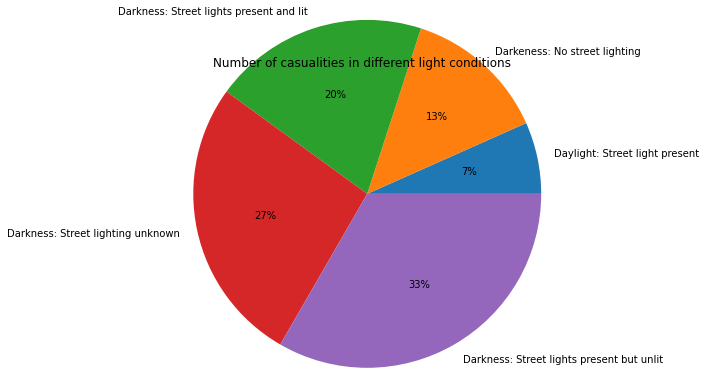

In [19]:
plt.pie(accident['Number_of_Casualties'].unique(), labels=accident['Light_Conditions'].unique(),autopct="%1.0f%%", radius=2)
plt.suptitle("Number of casualities in different light conditions",)

Text(0.5, 0.98, 'Casualties Distribution')

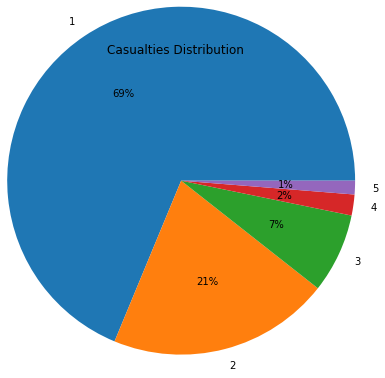

In [20]:
plt.pie(accident['Number_of_Casualties'].value_counts(),labels= accident['Number_of_Casualties'].value_counts().index,autopct="%1.0f%%", radius=2)
plt.suptitle("Casualties Distribution")

Text(0.5, 1.0, 'Accident Risk Index Distribution')

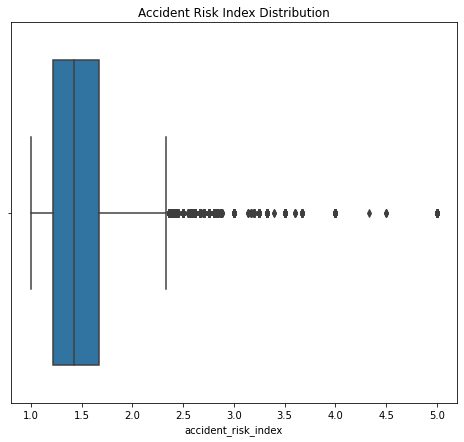

In [21]:
plt.figure(figsize=(8,7))
sns.boxplot(x='accident_risk_index', data=accident)
plt.title('Accident Risk Index Distribution')

1. The accident_risk_index ranges from 1.0 to 5.0.
2. The average accident_risk_index value is 1.47.
3. The boxplot explains that there are outliers above the third quartile.
4. Right skewed.

In [22]:
accident.accident_risk_index.skew()

1.5224727056629834

Text(0.5, 1.0, 'State Distribution')

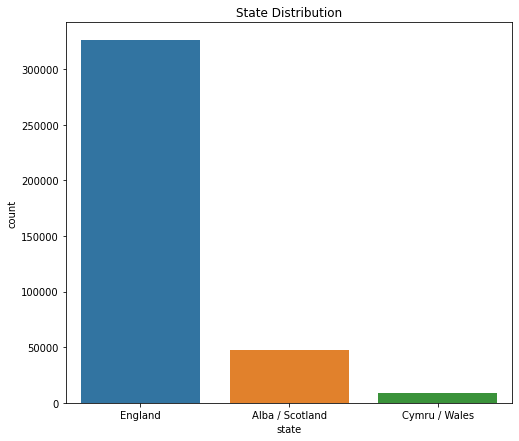

In [23]:
plt.figure(figsize=(8,7))
sns.countplot(x='state', data=accident)
plt.title("State Distribution")

Text(0.5, 1.0, 'state wise accident risk index')

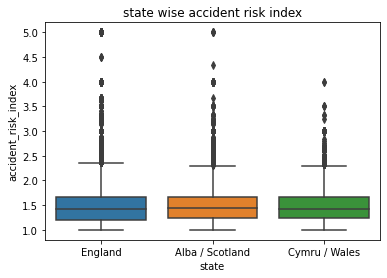

In [24]:
sns.boxplot(x='state', y='accident_risk_index', data=accident)
plt.title("state wise accident risk index")

Number of vehicles on the accident locations and comparing it with risk index.

Text(0.5, 1.0, 'Number of vehicles distribution')

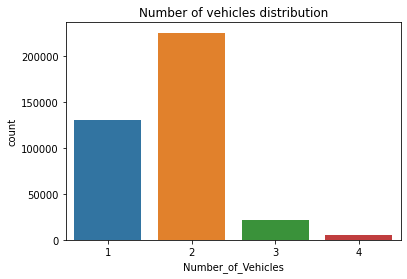

In [25]:
# Number of vehicles on the accident locations and comparing it with risk index.
sns.countplot(x='Number_of_Vehicles', data=accident)
plt.title("Number of vehicles distribution")

<AxesSubplot:xlabel='Number_of_Vehicles', ylabel='accident_risk_index'>

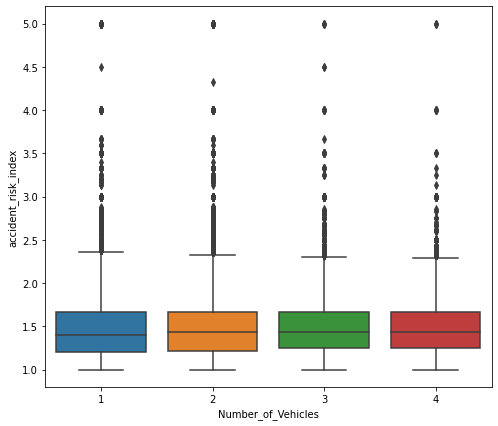

In [26]:
plt.figure(figsize=(8,7))
sns.boxplot(x='Number_of_Vehicles', y='accident_risk_index', data=accident)

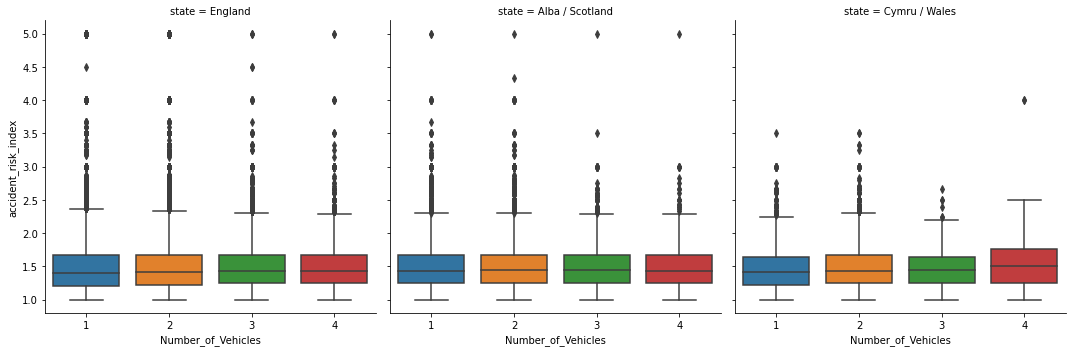

In [27]:
# state_wise accident risk index by each number of vehicles at the location
sns.catplot(x='Number_of_Vehicles', y='accident_risk_index', col='state', data=accident, kind='box')

There are mostly 1 or 2 vehicles at the location of the accident.
The average accident risk index is almost the same in all vehicle groups.

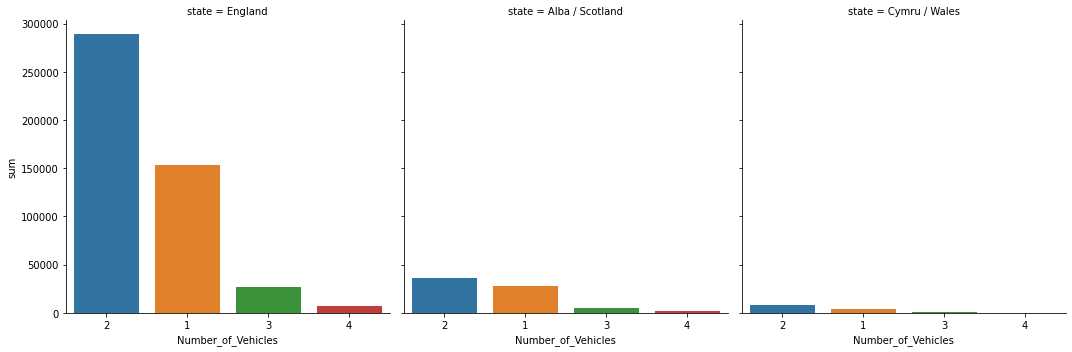

In [28]:
#Comparing state wise total casualties by each number of vehicles at the location.

sns.catplot(x= 'Number_of_Vehicles', y='sum',col='state', data=accident.astype({'Number_of_Vehicles':'str'}).groupby(['state','Number_of_Vehicles'])
            ['Number_of_Casualties'].agg({'sum'}).reset_index().sort_values('sum',ascending=False), kind='bar')

<AxesSubplot:xlabel='count', ylabel='Road_Type'>

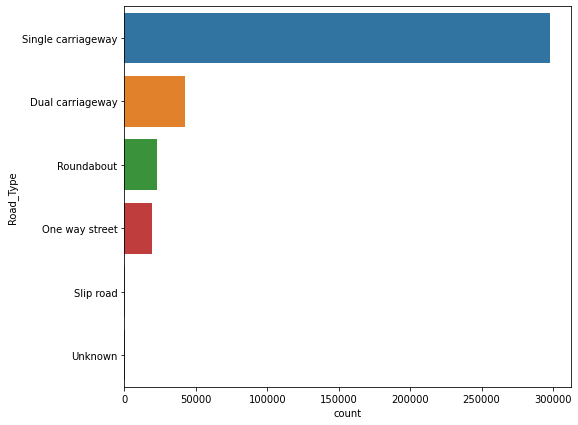

In [29]:
#Roadtype Distribution

plt.figure(figsize=(8,7))
sns.countplot(y='Road_Type', data=accident)

Most of the accidents happended in single carriageway road type.

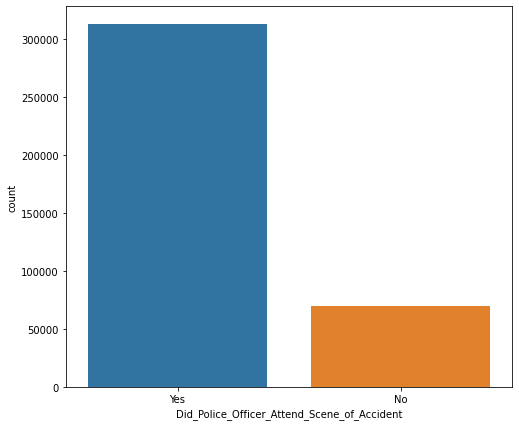

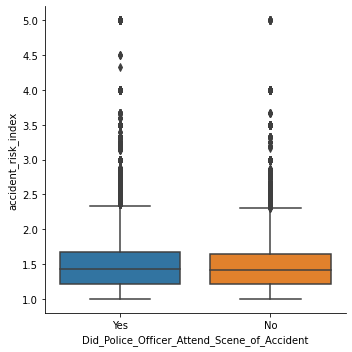

In [30]:
# Did police attended the scene of accident or not

plt.figure(figsize=(8,7))
sns.countplot(x='Did_Police_Officer_Attend_Scene_of_Accident', data=accident)
sns.catplot(x='Did_Police_Officer_Attend_Scene_of_Accident', y='accident_risk_index', data=accident, kind='box')

1. Most road accidents scenes are attended by the police
2. Risk index is almost same.

<Figure size 576x504 with 0 Axes>

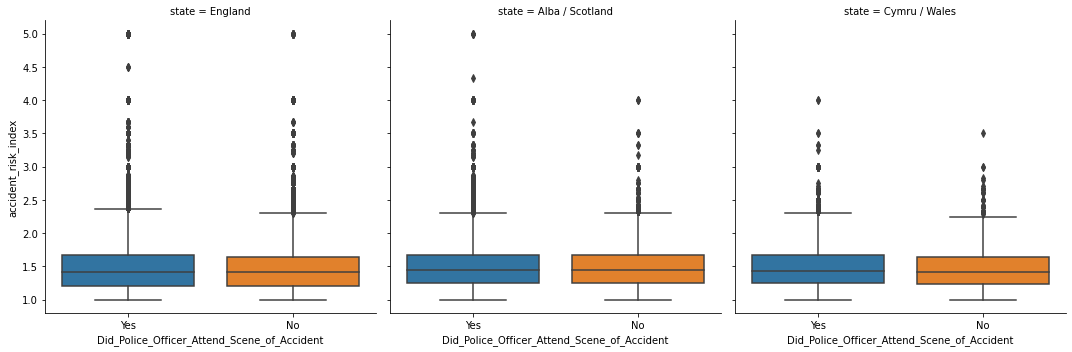

In [31]:
plt.figure(figsize=(8,7))
sns.catplot(x='Did_Police_Officer_Attend_Scene_of_Accident', y='accident_risk_index', col='state', data=accident, kind='box')

Accident risk is almost same in all states

array([[<AxesSubplot:title={'center':'Accident_ID'}>,
        <AxesSubplot:title={'center':'Police_Force'}>,
        <AxesSubplot:title={'center':'Number_of_Vehicles'}>,
        <AxesSubplot:title={'center':'Number_of_Casualties'}>],
       [<AxesSubplot:title={'center':'Day_of_Week'}>,
        <AxesSubplot:title={'center':'Local_Authority_(District)'}>,
        <AxesSubplot:title={'center':'1st_Road_Class'}>,
        <AxesSubplot:title={'center':'1st_Road_Number'}>],
       [<AxesSubplot:title={'center':'Speed_limit'}>,
        <AxesSubplot:title={'center':'2nd_Road_Class'}>,
        <AxesSubplot:title={'center':'2nd_Road_Number'}>,
        <AxesSubplot:title={'center':'Urban_or_Rural_Area'}>],
       [<AxesSubplot:title={'center':'total_casualties'}>,
        <AxesSubplot:title={'center':'accident_count'}>,
        <AxesSubplot:title={'center':'accident_risk_index'}>,
        <AxesSubplot:>]], dtype=object)

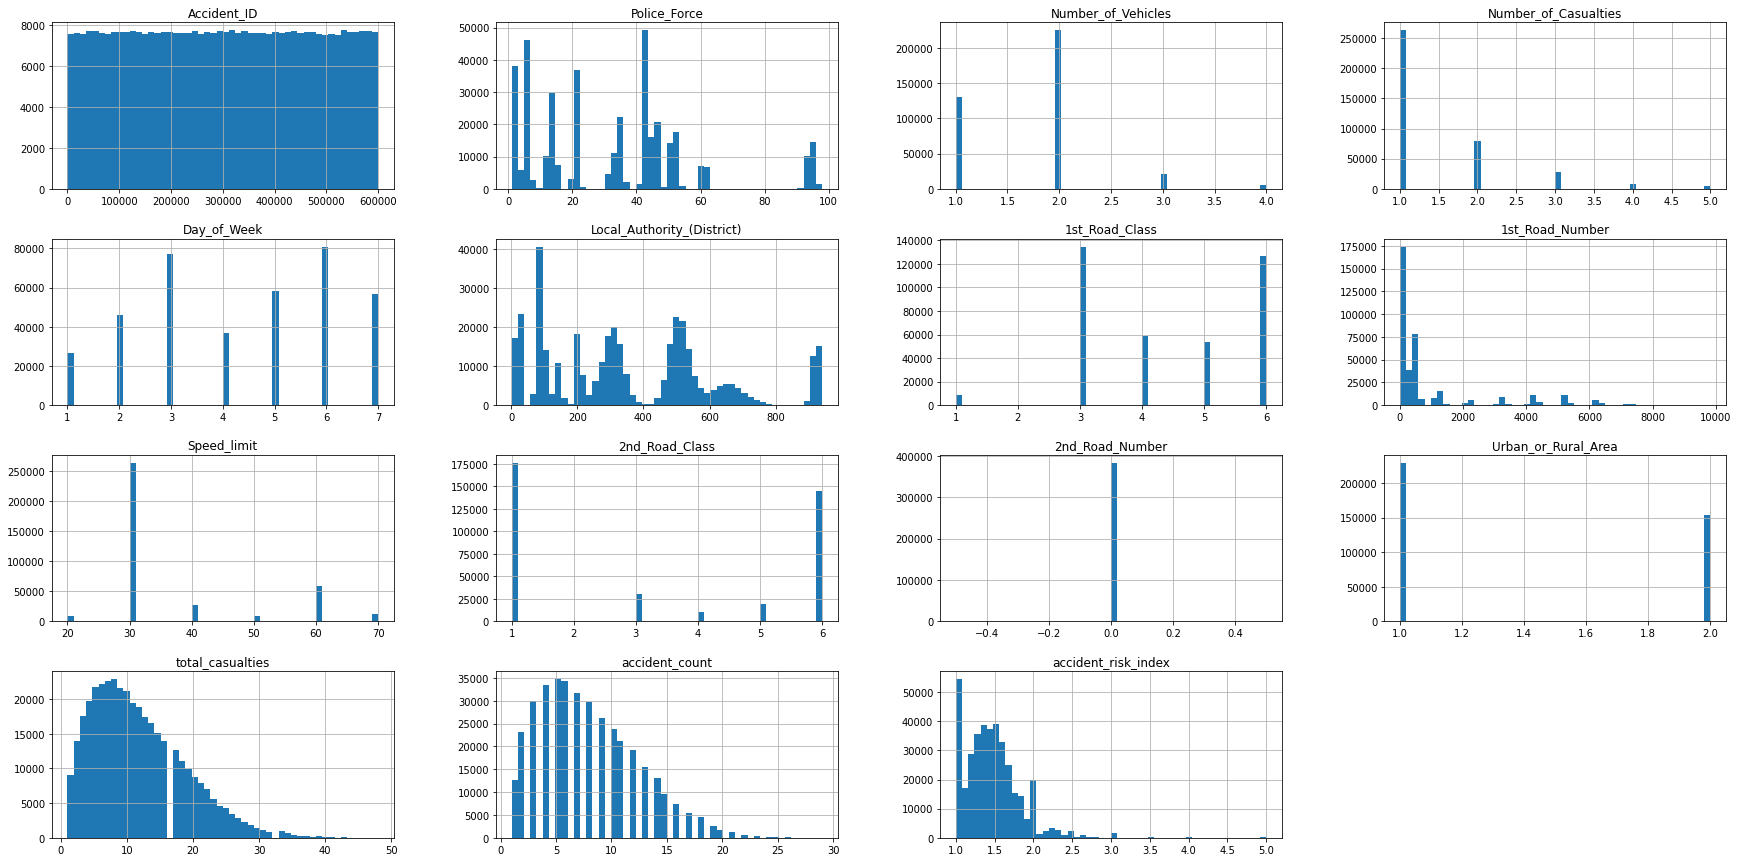

In [32]:
accident.hist(bins=50, figsize=(30,15))

In [33]:
# Removing outliers in Accident_risk_index column

accident.accident_risk_index.describe()

Q1 = accident.accident_risk_index.quantile(0.25)
Q3 = accident.accident_risk_index.quantile(0.75)

Q1, Q3

(1.22, 1.67)

In [34]:
IQR = Q3 - Q1
IQR

0.44999999999999996

In [35]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(0.545, 2.3449999999999998)

In [36]:
# Accident Risk index outliers

accident[(accident.accident_risk_index< lower_limit)|(accident.accident_risk_index>upper_limit)]

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,total_casualties,accident_count,accident_risk_index
28230,35387,1,2,4,15/10/12,3,18:50,24,E09000023,6,...,None,None,1,Yes,England,LA18 4EJ,United Kingdom,8,2,4.00
106819,133650,5,2,1,24/07/12,2,7:50,151,E10000003,1,...,None,None,2,Yes,England,BN15 9RA,United Kingdom,10,4,2.50
110870,138663,35,1,1,31/01/12,1,14:42,279,E10000032,4,...,None,None,2,No,England,SW1X 9LF,United Kingdom,6,2,3.00
187165,234438,52,1,5,08/09/12,5,16:44,476,S12000038,3,...,None,None,1,Yes,England,CR2 6PJ,United Kingdom,10,4,2.50
178562,223611,44,2,5,21/02/12,5,15:30,475,E10000007,5,...,None,None,1,Yes,England,PE25 1LT,United Kingdom,18,7,2.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443771,556223,6,2,2,29/02/12,6,13:25,90,W06000005,6,...,Roadworks,None,1,Yes,England,S4 7YS,United Kingdom,13,5,2.60
346230,433893,95,2,3,24/08/12,3,12:15,642,W06000022,6,...,None,None,1,Yes,Alba / Scotland,BH14 9EP,United Kingdom,10,4,2.50
97945,122544,32,2,4,30/03/12,7,21:38,328,E08000032,3,...,None,None,2,Yes,England,LS17 9HZ,United Kingdom,5,2,2.50
226470,283682,43,2,1,30/06/12,6,13:45,535,E10000030,6,...,None,None,1,Yes,England,BL6 5PG,United Kingdom,8,3,2.67


In [37]:
# Capping of Outliers

accident_df = accident.copy()

accident_df['accident_risk_index'] = np.where(
                                                accident_df['accident_risk_index']> upper_limit, upper_limit,
                                     np.where(
                                                accident_df['accident_risk_index']< lower_limit, lower_limit,
                                                accident_df['accident_risk_index'])
                                             )

In [38]:
accident_df.shape

(382582, 30)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function wit

<AxesSubplot:xlabel='accident_risk_index'>

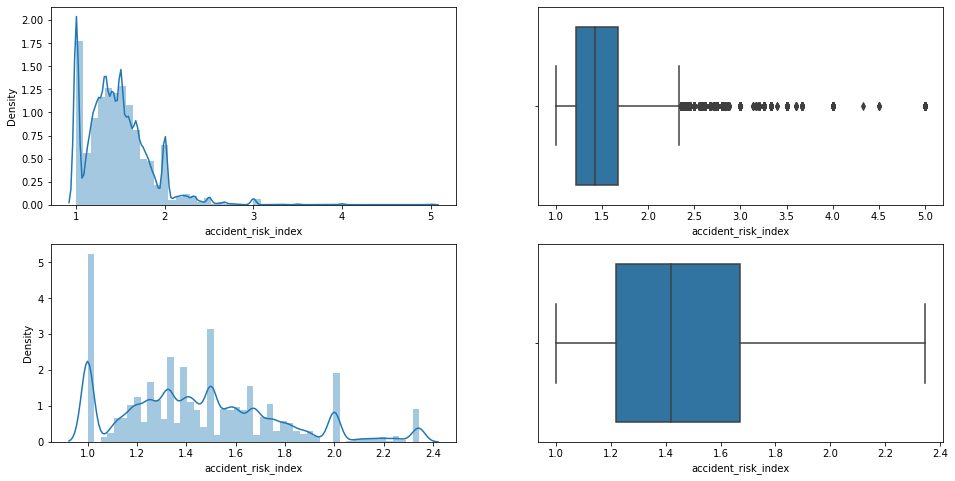

In [39]:
#Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(accident['accident_risk_index'])

plt.subplot(2,2,2)
sns.boxplot(accident['accident_risk_index'])

plt.subplot(2,2,3)
sns.distplot(accident_df['accident_risk_index'])

plt.subplot(2,2,4)
sns.boxplot(accident_df['accident_risk_index'])

In [40]:
accident_df.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,total_casualties,accident_count,accident_risk_index
63115,78911,62,2,1,02/11/12,7,23:00,660,E08000012,5,...,None,None,1,Yes,England,SA37 0JG,United Kingdom,24,14,1.71
370174,463955,16,1,1,22/02/12,7,5:45,192,E10000007,6,...,None,None,2,Yes,England,SE16 5AE,United Kingdom,2,2,1.00
19156,23970,46,2,1,21/03/12,6,15:30,515,E10000017,3,...,None,None,2,Yes,England,PL7 5EH,United Kingdom,28,14,2.00
219558,274978,36,3,1,10/12/12,5,13:31,317,E08000032,4,...,None,None,2,Yes,England,NE19 1BN,United Kingdom,4,4,1.00
440175,551705,50,2,1,23/02/12,5,8:00,580,E10000030,6,...,None,None,1,Yes,England,RM14 2HP,United Kingdom,16,11,1.45


In [41]:
# Handling date column
accident_df["Accident_day"] = pd.to_datetime(accident_df.Date, format="%d/%m/%y").dt.day
accident_df.Accident_day.head()

63115      2
370174    22
19156     21
219558    10
440175    23
Name: Accident_day, dtype: int64

In [42]:
accident_df["Accident_month"] = pd.to_datetime(accident_df.Date, format="%d/%m/%y").dt.month
accident_df.Accident_month.head()
accident_df.drop('Date', axis=1,inplace=True)

In [43]:
accident_df.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,...,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,total_casualties,accident_count,accident_risk_index,Accident_day,Accident_month
63115,78911,62,2,1,7,23:00,660,E08000012,5,9,...,1,Yes,England,SA37 0JG,United Kingdom,24,14,1.71,2,11
370174,463955,16,1,1,7,5:45,192,E10000007,6,1253,...,2,Yes,England,SE16 5AE,United Kingdom,2,2,1.00,22,2
19156,23970,46,2,1,6,15:30,515,E10000017,3,12,...,2,Yes,England,PL7 5EH,United Kingdom,28,14,2.00,21,3
219558,274978,36,3,1,5,13:31,317,E08000032,4,8,...,2,Yes,England,NE19 1BN,United Kingdom,4,4,1.00,10,12
440175,551705,50,2,1,5,8:00,580,E10000030,6,616,...,1,Yes,England,RM14 2HP,United Kingdom,16,11,1.45,23,2


In [44]:
#Extracting Time column
accident_df['accident_hr'] = pd.to_datetime(accident_df.Time).dt.hour
accident_df['accident_min'] = pd.to_datetime(accident_df.Time).dt.minute
accident_df.drop('Time', axis=1,inplace=True)

In [45]:
accident_df.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,...,state,postcode,country,total_casualties,accident_count,accident_risk_index,Accident_day,Accident_month,accident_hr,accident_min
63115,78911,62,2,1,7,660,E08000012,5,9,Single carriageway,...,England,SA37 0JG,United Kingdom,24,14,1.71,2,11,23,0
370174,463955,16,1,1,7,192,E10000007,6,1253,Single carriageway,...,England,SE16 5AE,United Kingdom,2,2,1.00,22,2,5,45
19156,23970,46,2,1,6,515,E10000017,3,12,Single carriageway,...,England,PL7 5EH,United Kingdom,28,14,2.00,21,3,15,30
219558,274978,36,3,1,5,317,E08000032,4,8,Single carriageway,...,England,NE19 1BN,United Kingdom,4,4,1.00,10,12,13,31
440175,551705,50,2,1,5,580,E10000030,6,616,Dual carriageway,...,England,RM14 2HP,United Kingdom,16,11,1.45,23,2,8,0


In [46]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382582 entries, 63115 to 475665
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_ID                                  382582 non-null  int64  
 1   Police_Force                                 382582 non-null  int64  
 2   Number_of_Vehicles                           382582 non-null  int64  
 3   Number_of_Casualties                         382582 non-null  int64  
 4   Day_of_Week                                  382582 non-null  int64  
 5   Local_Authority_(District)                   382582 non-null  int64  
 6   Local_Authority_(Highway)                    382582 non-null  object 
 7   1st_Road_Class                               382582 non-null  int64  
 8   1st_Road_Number                              382582 non-null  int64  
 9   Road_Type                                    382582 non

# Handling Categorical Data

1. **Nominal data** : data are not in any order --> **OneHotEncoder** is used in this case
2. **Ordinal data** : data are in order --> **LabelEncoder** is used in this case

In [47]:
accident_df.state.value_counts()

England            325785
Alba / Scotland     47805
Cymru / Wales        8992
Name: state, dtype: int64

In [48]:
# As state is a Nominal Categorical data, we will perform OneHotEncoding

State = accident_df[['state']]
State = pd.get_dummies(State)
State.head()

,state_Alba / Scotland,state_Cymru / Wales,state_England
63115,0,0,1
370174,0,0,1
19156,0,0,1
219558,0,0,1
440175,0,0,1


In [49]:
accident_df.Road_Type.value_counts()

Single carriageway    297602
Dual carriageway       42166
Roundabout             22897
One way street         19489
Slip road                402
Unknown                   26
Name: Road_Type, dtype: int64

In [50]:
# As Road_type is a Nominal Categorical data, we will perform OneHotEncoding

Road_Type = accident_df[['Road_Type']]
Road_Type = pd.get_dummies(Road_Type)
Road_Type.head()

,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown
63115,0,0,0,1,0,0
370174,0,0,0,1,0,0
19156,0,0,0,1,0,0
219558,0,0,0,1,0,0
440175,1,0,0,0,0,0


In [51]:
accident_df.Carriageway_Hazards.value_counts()

None                                       367243
Other object in carriageway                 13874
Any animal (except a ridden horse)           1118
Pedestrian in carriageway (not injured)       258
Involvement with previous accident             60
Dislodged vehicle load in carriageway          29
Name: Carriageway_Hazards, dtype: int64

In [52]:
# As Carriageway_Hazards is a Nominal Categorical data, we will perform OneHotEncoding

Carriageway_Hazards = accident_df[['Carriageway_Hazards']]
Carriageway_Hazards = pd.get_dummies(Carriageway_Hazards)
Carriageway_Hazards.head()

,Carriageway_Hazards_Any animal (except a ridden horse),Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured)
63115,0,0,0,1,0,0
370174,0,0,0,1,0,0
19156,0,0,0,1,0,0
219558,0,0,0,1,0,0
440175,0,0,0,1,0,0


In [53]:
accident_df.Weather_Conditions.value_counts()

Fine without high winds       303249
Raining without high winds     43024
Raining with high winds        16161
Fine with high winds           11769
Snowing without high winds      3649
Other                           3603
Fog or mist                      841
Snowing with high winds          197
Unknown                           89
Name: Weather_Conditions, dtype: int64

In [54]:
# As Weather_Conditions is a Nominal Categorical data, we will perform OneHotEncoding

Weather_Conditions = accident_df[['Weather_Conditions']]
Weather_Conditions = pd.get_dummies(Weather_Conditions)
Weather_Conditions.head()

,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
63115,0,1,0,0,0,0,0,0,0
370174,1,0,0,0,0,0,0,0,0
19156,0,0,0,0,1,0,0,0,0
219558,0,1,0,0,0,0,0,0,0
440175,0,1,0,0,0,0,0,0,0


In [55]:
accident_df.Road_Surface_Conditions.value_counts()

Dry                          292592
Wet/Damp                      70075
Frost/Ice                     12966
Snow                           6879
Flood (Over 3cm of water)        70
Name: Road_Surface_Conditions, dtype: int64

In [56]:
# As Road_Surface_Conditions is a Nominal Categorical data, we will perform OneHotEncoding

Road_Surface_Conditions = accident_df[['Road_Surface_Conditions']]
Road_Surface_Conditions = pd.get_dummies(Road_Surface_Conditions)
Road_Surface_Conditions.head()

,Road_Surface_Conditions_Dry,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp
63115,1,0,0,0,0
370174,0,0,0,0,1
19156,0,0,0,0,1
219558,1,0,0,0,0
440175,1,0,0,0,0


In [57]:
accident_df.Special_Conditions_at_Site.value_counts()

None                                               342044
Roadworks                                           36078
Ol or diesel                                         1105
Road surface defective                               1017
Mud                                                   882
Auto traffic singal out                               709
Permanent sign or marking defective or obscured       531
Auto traffic signal partly defective                  216
Name: Special_Conditions_at_Site, dtype: int64

In [58]:
# As Special_Conditions_at_Site is a Nominal Categorical data, we will perform OneHotEncoding

Special_Conditions_at_Site = accident_df[['Special_Conditions_at_Site']]
Special_Conditions_at_Site = pd.get_dummies(Special_Conditions_at_Site)
Special_Conditions_at_Site.head()

,Special_Conditions_at_Site_Auto traffic signal partly defective,Special_Conditions_at_Site_Auto traffic singal out,Special_Conditions_at_Site_Mud,Special_Conditions_at_Site_None,Special_Conditions_at_Site_Ol or diesel,Special_Conditions_at_Site_Permanent sign or marking defective or obscured,Special_Conditions_at_Site_Road surface defective,Special_Conditions_at_Site_Roadworks
63115,0,0,0,1,0,0,0,0
370174,0,0,0,1,0,0,0,0
19156,0,0,0,1,0,0,0,0
219558,0,0,0,1,0,0,0,0
440175,0,0,0,1,0,0,0,0


In [59]:
accident_df['Pedestrian_Crossing-Physical_Facilities'].value_counts()

No physical crossing within 50 meters          323155
Pedestrian phase at traffic signal junction     28546
Zebra crossing                                  21603
non-junction pedestrian crossing                 7788
Central refuge                                   1440
Footbridge or subway                               50
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

In [60]:
# As Pedestrian_Crossing-Physical_Facilities is a Nominal Categorical data, we will perform OneHotEncoding

Pedestrian_Crossing_Physical_Facilities = accident_df[['Pedestrian_Crossing-Physical_Facilities']]
Pedestrian_Crossing_Physical_Facilities = pd.get_dummies(Pedestrian_Crossing_Physical_Facilities)
Pedestrian_Crossing_Physical_Facilities.head()

,Pedestrian_Crossing-Physical_Facilities_Central refuge,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing
63115,0,0,1,0,0,0
370174,0,0,1,0,0,0
19156,0,0,1,0,0,0
219558,0,0,1,0,0,0
440175,0,0,1,0,0,0


In [61]:
accident_df.Light_Conditions.value_counts()

Daylight: Street light present               301971
Darkness: Street lights present and lit       56589
Darkness: Street lighting unknown             13399
Darkeness: No street lighting                 10478
Darkness: Street lights present but unlit       145
Name: Light_Conditions, dtype: int64

In [62]:
# As Light_Conditions is a Nominal Categorical data, we will perform OneHotEncoding

Light_Conditions = accident_df[['Light_Conditions']]
Light_Conditions = pd.get_dummies(Light_Conditions)
Light_Conditions.head()

,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present
63115,0,0,0,0,1
370174,1,0,0,0,0
19156,0,0,0,0,1
219558,0,0,0,0,1
440175,0,0,0,0,1


In [63]:
accident_df['Pedestrian_Crossing-Human_Control'].value_counts()

None within 50 metres                 363665
Control by other authorised person     18890
Control by school crossing patrol         27
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [64]:
# As Pedestrian_Crossing-Human_Control is a Nominal Categorical data, we will perform OneHotEncoding

Pedestrian_Crossing_Human_Control = accident_df[['Pedestrian_Crossing-Human_Control']]
Pedestrian_Crossing_Human_Control = pd.get_dummies(Pedestrian_Crossing_Human_Control)
Pedestrian_Crossing_Human_Control.head()

,Pedestrian_Crossing-Human_Control_Control by other authorised person,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres
63115,0,0,1
370174,0,0,1
19156,1,0,0
219558,0,0,1
440175,0,0,1


In [65]:
accident_df.Did_Police_Officer_Attend_Scene_of_Accident.value_counts()

Yes    312571
No      70011
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [66]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

accident_df['Did_Police_Officer_Attend_Scene_of_Accident'].replace({'No': 0, "Yes": 1}, inplace = True)

In [67]:
accident_df.drop(['Accident_ID','Local_Authority_(Highway)','postcode','country','Road_Type','state','Pedestrian_Crossing-Human_Control','Light_Conditions','Pedestrian_Crossing-Physical_Facilities','Special_Conditions_at_Site','Road_Surface_Conditions','Weather_Conditions','Carriageway_Hazards'], axis=1, inplace=True)

In [68]:
accident_df.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,total_casualties,accident_count,accident_risk_index,Accident_day,Accident_month,accident_hr,accident_min
63115,62,2,1,7,660,5,9,30,1,0,1,1,24,14,1.71,2,11,23,0
370174,16,1,1,7,192,6,1253,30,1,0,2,1,2,2,1.00,22,2,5,45
19156,46,2,1,6,515,3,12,60,5,0,2,1,28,14,2.00,21,3,15,30
219558,36,3,1,5,317,4,8,30,5,0,2,1,4,4,1.00,10,12,13,31
440175,50,2,1,5,580,6,616,70,1,0,1,1,16,11,1.45,23,2,8,0


In [69]:
# Concatenate dataframe -->

accident_df = pd.concat([accident_df, State, Road_Type, Light_Conditions, Weather_Conditions, Pedestrian_Crossing_Human_Control, Pedestrian_Crossing_Physical_Facilities, Special_Conditions_at_Site, Road_Surface_Conditions, Carriageway_Hazards], axis = 1)

In [70]:
accident_df.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,...,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Carriageway_Hazards_Any animal (except a ridden horse),Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured)
63115,62,2,1,7,660,5,9,30,1,0,...,0,0,0,0,0,0,0,1,0,0
370174,16,1,1,7,192,6,1253,30,1,0,...,0,0,0,1,0,0,0,1,0,0
19156,46,2,1,6,515,3,12,60,5,0,...,0,0,0,1,0,0,0,1,0,0
219558,36,3,1,5,317,4,8,30,5,0,...,0,0,0,0,0,0,0,1,0,0
440175,50,2,1,5,580,6,616,70,1,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382582 entries, 63115 to 475665
Data columns (total 70 columns):
 #   Column                                                                               Non-Null Count   Dtype  
---  ------                                                                               --------------   -----  
 0   Police_Force                                                                         382582 non-null  int64  
 1   Number_of_Vehicles                                                                   382582 non-null  int64  
 2   Number_of_Casualties                                                                 382582 non-null  int64  
 3   Day_of_Week                                                                          382582 non-null  int64  
 4   Local_Authority_(District)                                                           382582 non-null  int64  
 5   1st_Road_Class                                                             

In [72]:
accident_df.isnull().sum()

Police_Force                                                   0
Number_of_Vehicles                                             0
Number_of_Casualties                                           0
Day_of_Week                                                    0
Local_Authority_(District)                                     0
                                                              ..
Carriageway_Hazards_Dislodged vehicle load in carriageway      0
Carriageway_Hazards_Involvement with previous accident         0
Carriageway_Hazards_None                                       0
Carriageway_Hazards_Other object in carriageway                0
Carriageway_Hazards_Pedestrian in carriageway (not injured)    0
Length: 70, dtype: int64

# Correlation Matrix

In [73]:
corr_matrix = accident_df.corr()
corr_matrix['accident_risk_index'].sort_values(ascending=False)

accident_risk_index             1.000000
Number_of_Casualties            0.429098
total_casualties                0.354934
accident_count                  0.084941
Speed_limit                     0.021977
                                  ...   
2nd_Road_Class                 -0.020385
Road_Type_Single carriageway   -0.021090
Accident_month                 -0.021266
1st_Road_Class                 -0.035027
2nd_Road_Number                      NaN
Name: accident_risk_index, Length: 70, dtype: float64

In [74]:
from pandas.plotting import scatter_matrix
attributes= ['accident_risk_index', 'Number_of_Casualties','total_casualties','Speed_limit',  '1st_Road_Class', 'Accident_month', 'Road_Type_Single carriageway']
scatter_matrix(accident_df[attributes], figsize=(30,15))

# Feature Selection

In [75]:
X = accident_df.drop('accident_risk_index', axis=1)
X.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,...,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Carriageway_Hazards_Any animal (except a ridden horse),Carriageway_Hazards_Dislodged vehicle load in carriageway,Carriageway_Hazards_Involvement with previous accident,Carriageway_Hazards_None,Carriageway_Hazards_Other object in carriageway,Carriageway_Hazards_Pedestrian in carriageway (not injured)
63115,62,2,1,7,660,5,9,30,1,0,...,0,0,0,0,0,0,0,1,0,0
370174,16,1,1,7,192,6,1253,30,1,0,...,0,0,0,1,0,0,0,1,0,0
19156,46,2,1,6,515,3,12,60,5,0,...,0,0,0,1,0,0,0,1,0,0
219558,36,3,1,5,317,4,8,30,5,0,...,0,0,0,0,0,0,0,1,0,0
440175,50,2,1,5,580,6,616,70,1,0,...,0,0,0,0,0,0,0,1,0,0


In [76]:
y = accident_df['accident_risk_index']
y.head()

63115     1.71
370174    1.00
19156     2.00
219558    1.00
440175    1.45
Name: accident_risk_index, dtype: float64

<AxesSubplot:>

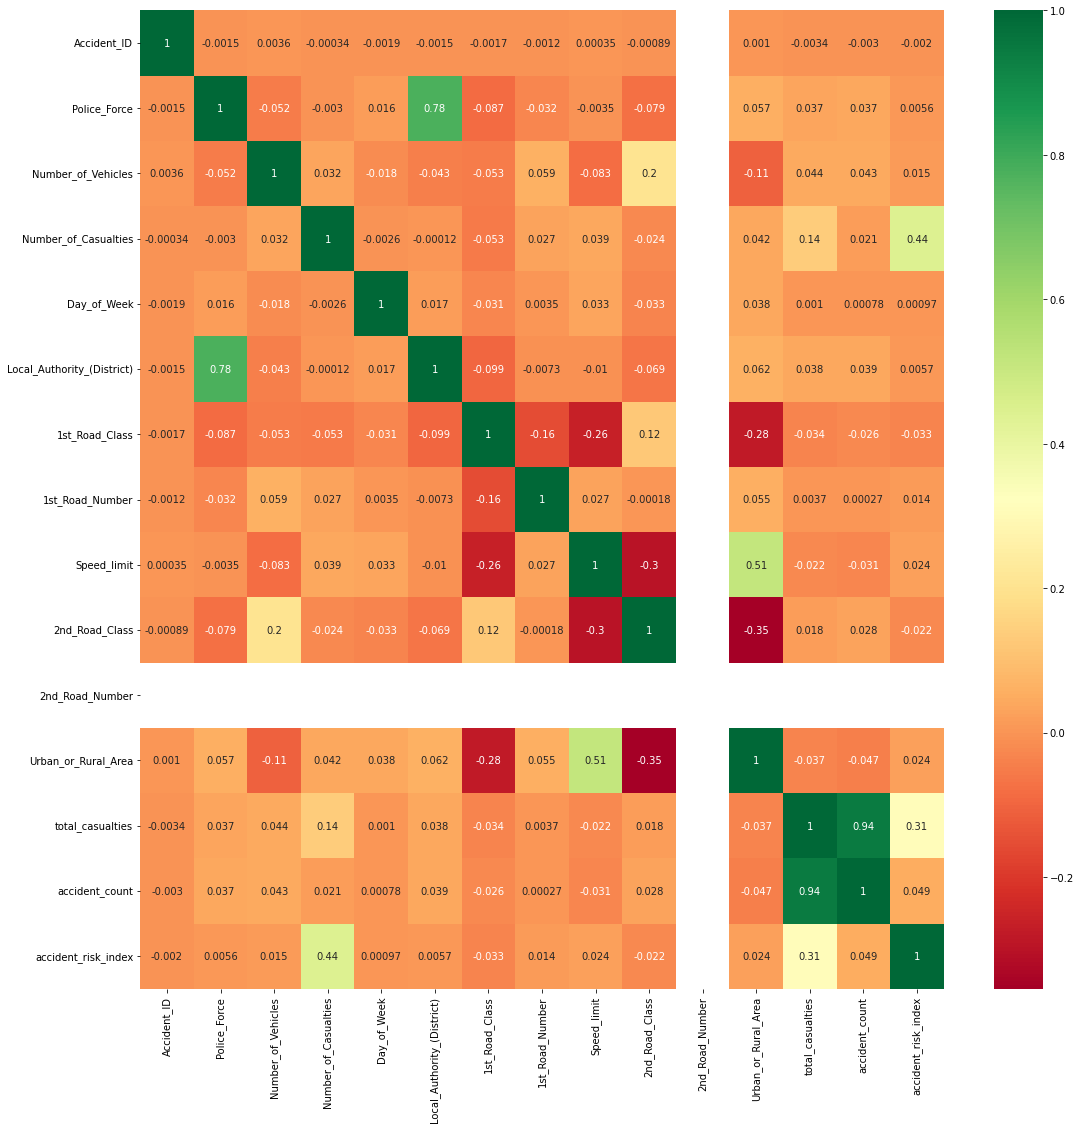

In [77]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(accident.corr(), annot = True, cmap = "RdYlGn")

In [78]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [79]:
print(selection.feature_importances_)

[8.21422826e-06 2.08373170e-06 1.87168759e-01 3.12876791e-06
 7.89663740e-06 2.73926697e-06 3.45117304e-06 2.55022202e-06
 1.69813141e-05 0.00000000e+00 2.84374601e-06 2.46605365e-06
 4.22974171e-01 3.89731100e-01 2.63265532e-06 4.30983241e-06
 3.44820265e-06 3.55594553e-06 3.51966452e-06 8.22910449e-07
 1.34334176e-05 1.80972310e-06 9.74763038e-07 1.97742498e-06
 2.67446673e-06 4.30348181e-07 9.00312637e-08 1.03085716e-06
 2.82037217e-06 1.18484529e-06 6.15924817e-15 1.35037807e-06
 8.93153064e-07 1.57319533e-06 4.14117636e-07 6.34991345e-07
 4.70656460e-07 2.11018367e-06 2.76021785e-07 2.99902456e-07
 2.63955013e-15 5.02180438e-07 4.37412491e-16 8.41417767e-07
 3.67210988e-07 6.96491285e-16 2.15021460e-06 1.44049941e-06
 1.29436741e-06 6.80399738e-07 8.40089176e-07 1.39839525e-06
 1.17394353e-07 1.20335162e-06 5.38040064e-09 6.52345659e-07
 1.22006777e-06 8.02770239e-07 1.89090145e-06 2.95766453e-15
 7.84345520e-07 7.85442048e-07 1.60508800e-06 6.51807383e-08
 1.03146651e-15 1.195650

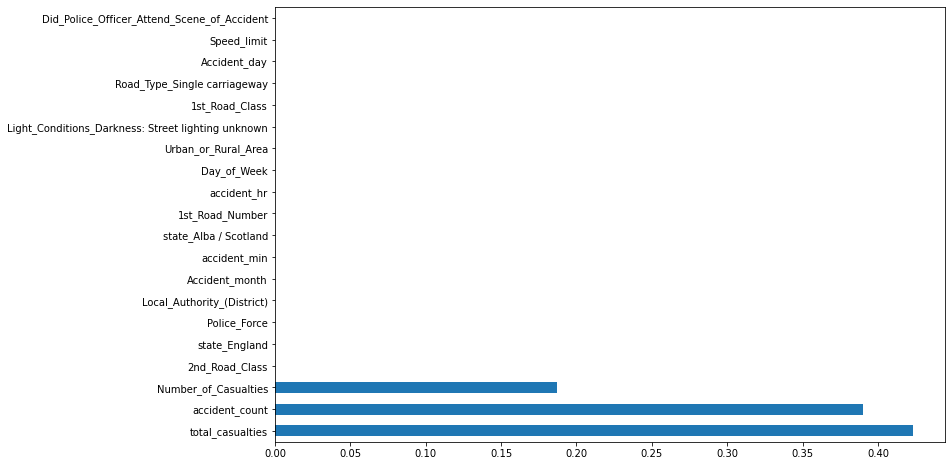

In [80]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting Model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    
    ('std_scaler', StandardScaler())
])

In [83]:
X_train_tr = my_pipeline.fit_transform(X_train)

In [84]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train_tr, y_train)

RandomForestRegressor()

In [85]:
X_test_tr = my_pipeline.fit_transform(X_test)
y_pred = reg_rf.predict(X_test_tr)

In [86]:
reg_rf.score(X_train_tr, y_train)

0.9999948993632001

In [87]:
reg_rf.score(X_test_tr, y_test)

0.9999707798750568

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


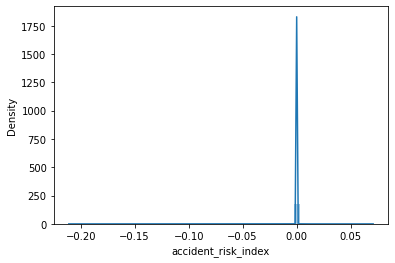

In [88]:
sns.distplot(y_test-y_pred)
plt.show()

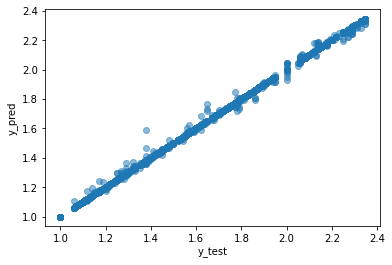

In [89]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [90]:
from sklearn import metrics

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.00488780330552e-05
MSE: 3.1368418782753868e-06
RMSE: 0.0017711131748918212


In [92]:
metrics.r2_score(y_test, y_pred)

0.9999707798750568